# Mentoria de  Detección de Fraude de Tarjeta de Crédito  
## Trabajo: Aprendizaje supervisado.

1. Preparamos los datos para comenzar el entrenamiento del modelo tal y como vimos en clase. Para esto debemos considerar la cantidad de registros en el train y en el test. Además de esto vamos a tener que tomar alguna decisión en torno al problema del desbalanceo de nuestro dataset.

- Preparar los datos: división entre entrenamiento y testeo. Pueden utilizar las herramientas provistas por la librería sckit-learn. **Consejo**: cuando trabajamos con librerías extensas y con diversos módulos -como es el caso de scikit-learn- por lo general no queremos cargar todos los elementos o scripts de dicha librería (porque es algo poco eficiente en términos de recursos). Así que solo vamos a ir "llamando" a aquellos módulos dentro de la librería que vayamos a usar de hecho, por ejemplo, **train_test_split**
- Preparar un dataset **balanceando** los datos y preparar train y test. Nuevamente la librería scikit-learn les provee herramientas para balancear los datasets, pero son libres de usar las herramientas que gusten siempre y cuando se tomen el trabajo de explicar al menos en un reglón cómo se implementa y la lógica con la que funciona el código.

2. Ahora vamos a elegir dos tipos de modelos entre los siguientes: XGBoost, Logistic Regression, Random Forest. La idea es aproximarnos a la resolución del problema teniendo en cuenta una variedad de estrategias para solucionarlo. 
- Entrenar ambos modelos con los datasets.
- Comparar los modelos entrenados usando AUC ROC y al menos dos de las siguientes métricas: precision, recall, F1, accuracy. Fundamentar la elección de las métricas según el modelo y el problema a abordar.
- ¿Qué modelo dio mejor resultado? ¿Hay una mejoría en general con el dataset balanceado?

### Presentación : Equipo de trabajo <a class="anchor" id="presentacion"></a>


Integrantes:

* Baulina,David

* Carabajal,Javier

* Folonier,Hugo

* Tula,Melani

#- Librerias

In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from collections import Counter 
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix, precision_score,accuracy_score,classification_report,recall_score,roc_auc_score,roc_curve
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler,NearMiss
from imblearn.combine import SMOTETomek
from sklearn import ensemble
from sklearn.linear_model import LogisticRegression
from collections import Counter
from google.colab import files
import plotly.graph_objs as go
import io
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay






#from sklearn import #agreguen lo que vayan a usar 

In [ ]:
df_1 = pd.read_csv('https://raw.githubusercontent.com/hfolo/DiploDatos2022/main/00%20-%20Mentoria%20-%20deteccion%20de%20fraude%20en%20pagos%20de%20tarjeta%20de%20credito/dataset/df_unidos_Last_Hour_pt1.csv', index_col=0)
df_2 = pd.read_csv('https://raw.githubusercontent.com/hfolo/DiploDatos2022/main/00%20-%20Mentoria%20-%20deteccion%20de%20fraude%20en%20pagos%20de%20tarjeta%20de%20credito/dataset/df_unidos_Last_Hour_pt2.csv', index_col=0)
df_unidos=pd.concat([df_1,df_2], ignore_index=True)
df_unidos.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df_unidos['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

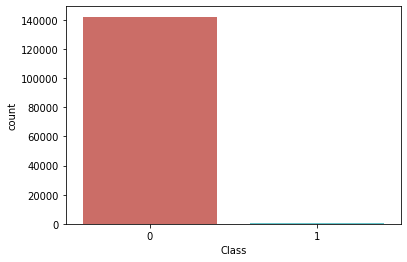

In [ ]:
sns.countplot(x='Class',data=df_2,palette='hls')

##- Submuestreo

**Para poder balancer el Data Set elegimos la opcion de Near-Miss (Perdidias Cercanos), lo que hace este metodo es quitar de la clase mas representada los datos que se encuentran mas cerca de la clase menor**

# División, Entrenamiento y Evaluación

# Reg. Logistica:

## Datos sin Balancear

In [ ]:
# Datos sin Balancer
variables=['Amount','last_hour_fraud','V11','V20']
X=df_unidos[variables]
y=df_unidos.Class

X = StandardScaler().fit_transform(X)
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state = 8)

scaled_df=X

In [ ]:
#Train
reg_logistica=LogisticRegression()
reg_logistica.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Matriz de confusion
y_predic_test=reg_logistica.predict(x_test)
mat_test=confusion_matrix(y_test,y_predic_test)
print('Matriz de confusion')
print(mat_test)

Matriz de confusion
[[85277     8]
 [  107    51]]


Accuracy train rlog_unbalanced: 99.87%
Accuracy test rlog_unbalanced: 99.87%


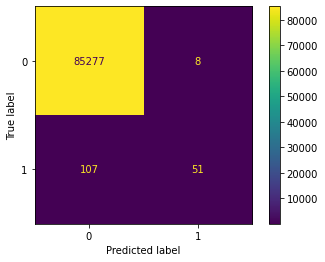

In [ ]:
rlog_unbalanced = reg_logistica.predict(x_train)
accuracy = accuracy_score(y_train, rlog_unbalanced)
print(f"Accuracy train rlog_unbalanced: %.2f%%" % (accuracy * 100.0))

test_predictions = reg_logistica.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test rlog_unbalanced: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

In [ ]:
#Test
prediccion_test= precision_score(y_test,y_predic_test)
print('presicion del modelo')
print(prediccion_test)

presicion del modelo
0.864406779661017


In [ ]:
#Test
print(classification_report(y_test,y_predic_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.86      0.32      0.47       158

    accuracy                           1.00     85443
   macro avg       0.93      0.66      0.73     85443
weighted avg       1.00      1.00      1.00     85443



Clasificación aleatoria: ROC AUC=0.500
Modelo regresión logística: ROC AUC=0.923


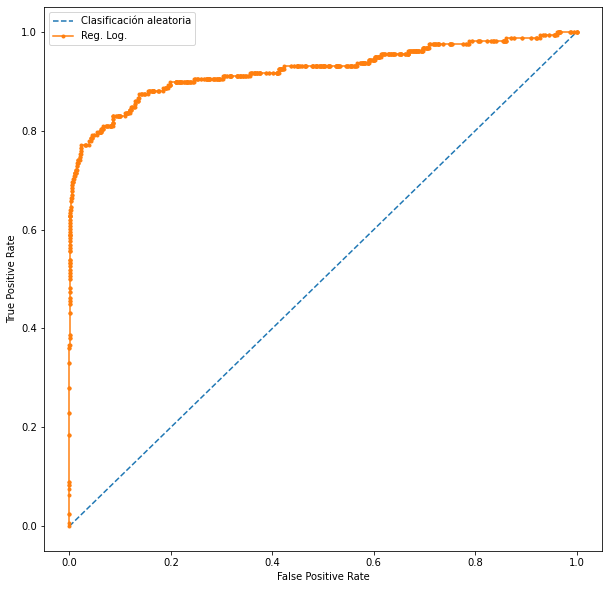

In [ ]:
# # Entrenamiento de modelo - Reg. logística:

# # Importar módulo:
# from sklearn.linear_model import LogisticRegression

# # Creamos el clasificador:
# model = LogisticRegression()
                            
# # Entrenamiento del modelo (clasificador):
# model.fit(Z_train, W_train)
# # Auxiliar para modelo aleatorio (comparación)
ns_probs = [0 for _ in range(len(y_test))]

# Generamos las probabilidades de pertenecer a cada clase usando el test.
lr_probs = reg_logistica.predict_proba(x_test)


# Dejamos sólo la probabilidad de clase = 1.
lr_probs = lr_probs[:, 1]

# AUC del modelo:
lr_auc = roc_auc_score(y_test, lr_probs)

# AUC del modelo aleatorio de comparación:
ns_auc = roc_auc_score(y_test, ns_probs)

# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc))
print('Modelo regresión logística: ROC AUC=%.3f' % (lr_auc))

lr_fpr_unbalanced, lr_tpr_unbalanced, _ = roc_curve(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_unbalanced, lr_tpr_unbalanced, marker='.', label='Reg. Log.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Datos Balanceados

In [ ]:
#Datos Balanceados
#Train and Test
##X_near ==Train balanceado
##X_near_test
##Y_near
##Y_near_test

near = NearMiss()
df_Near,Clase_Near =near.fit_resample(x_train,y_train)

X_near = df_Near
Y_near = Clase_Near

In [ ]:
# Cantidad de fraudes y no fraudes del balanceado
df_prueba = pd.DataFrame(df_Near,columns=['Amount','last_hour_fraud','V11','V20'])
df_prueba['Class'] = Clase_Near
df_prueba['Class'].value_counts()

0    334
1    334
Name: Class, dtype: int64

In [ ]:
#Train rlog_balanced
reg_logistica_bal=LogisticRegression()
reg_logistica_bal.fit(X_near,Y_near)

LogisticRegression()

In [ ]:
#Test rlog_balanced
x_predic_reg_logistica_balanced= reg_logistica_bal.predict(x_test)

In [ ]:
#Test rlog_balanced Classification Report
print(classification_report(y_test, x_predic_reg_logistica_balanced))

              precision    recall  f1-score   support

           0       1.00      0.83      0.91     85285
           1       0.01      0.84      0.02       158

    accuracy                           0.83     85443
   macro avg       0.50      0.83      0.46     85443
weighted avg       1.00      0.83      0.90     85443



In [ ]:
#Test Matriz de confusion rlog_balanced
mat_test=confusion_matrix(y_test,x_predic_reg_logistica_balanced)
print('Matriz de confusion')
print(mat_test)

Matriz de confusion
[[70648 14637]
 [   26   132]]


Accuracy train rlog_unbalanced: 90.87%
Accuracy test rlog_balanced: 82.84%


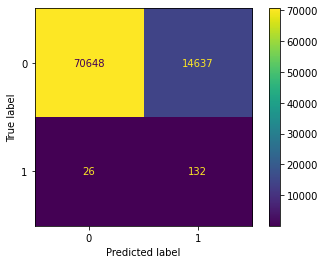

In [ ]:
rlog_balanced = reg_logistica_bal.predict(X_near)
accuracy = accuracy_score(Y_near, rlog_balanced)
print(f"Accuracy train rlog_unbalanced: %.2f%%" % (accuracy * 100.0))

test_predictions = reg_logistica_bal.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test rlog_balanced: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

La matriz de confusión se define como:

\begin{bmatrix}
VN & FP \\
FN & VP
\end{bmatrix}

Esto es, la entrada superior izquierda de la matriz corresponde a los verdaderos ceros (VN), la entrada superior derecha corresponde a los falsos unos (FP), la entrada inferior izquierda son los falsos ceros (FN) y la entrada inferior derecha los verdederos unos (VP). Como resultado positivo consideramos al 0 y como negativo al 1. 

Clasificación aleatoria: ROC AUC=0.500
Modelo regresión logística: ROC AUC=0.881


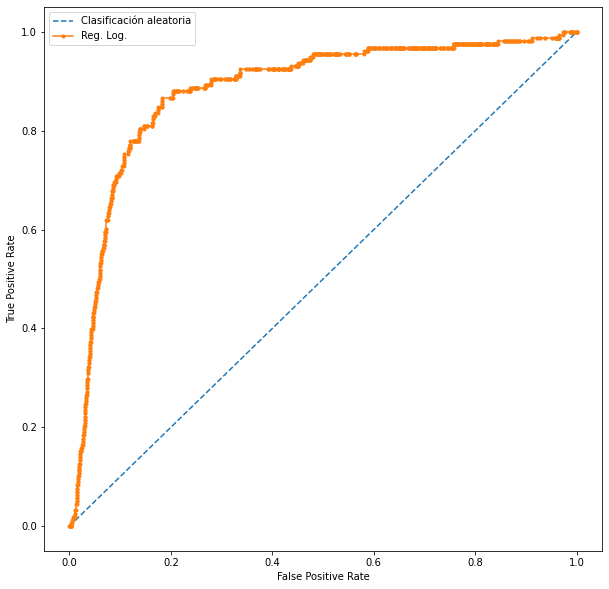

In [ ]:
# # Entrenamiento de modelo - Reg. logística:

# # Importar módulo:
# from sklearn.linear_model import LogisticRegression

# # Creamos el clasificador:
# model = LogisticRegression()
                            
# # Entrenamiento del modelo (clasificador):
# model.fit(Z_train, W_train)
# # Auxiliar para modelo aleatorio (comparación)
ns_probs = [0 for _ in range(len(y_test))]

# Generamos las probabilidades de pertenecer a cada clase usando el test.
lr_probs = reg_logistica_bal.predict_proba(x_test)


# Dejamos sólo la probabilidad de clase = 1.
lr_probs = lr_probs[:, 1]

# AUC del modelo:
lr_auc = roc_auc_score(y_test, lr_probs)

# AUC del modelo aleatorio de comparación:
ns_auc = roc_auc_score(y_test, ns_probs)

# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc))
print('Modelo regresión logística: ROC AUC=%.3f' % (lr_auc))

lr_fpr_balanced, lr_tpr_balanced, _ = roc_curve(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_balanced, lr_tpr_balanced, marker='.', label='Reg. Log.')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# XGBoost:

## Datos Sin Balancear

In [ ]:
xgbc0 = xgb.XGBClassifier()

In [ ]:
parameters= {'ntreads':[1],
            'objetive': ['binary:logistic'],
            'learning_rate': [0.05,0.1], #tasa de aprendisaje
             'n_estimators':[100,200] #numeros de arboles
            }

In [ ]:
clf=GridSearchCV(xgbc0,parameters,scoring='accuracy',cv=3)
clf.fit(x_train, y_train);


In [ ]:
clf.best_score_
Best_xgb=clf.best_estimator_
x_predic_xgb=clf.predict(x_test)
print(classification_report(y_test,x_predic_xgb))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.89      0.54      0.67       158

    accuracy                           1.00     85443
   macro avg       0.95      0.77      0.84     85443
weighted avg       1.00      1.00      1.00     85443



In [ ]:
y_predic_xgb=Best_xgb.predict(x_test)
comp=pd.DataFrame({'real':y_test,'predic':y_predic_xgb})
print(classification_report(y_test,y_predic_xgb))
comp.head()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.89      0.54      0.67       158

    accuracy                           1.00     85443
   macro avg       0.95      0.77      0.84     85443
weighted avg       1.00      1.00      1.00     85443



,real,predic
135624,0,0
244064,0,0
67694,0,0
232400,0,0
227940,0,0


In [ ]:
mat=confusion_matrix(y_test,y_predic_xgb)
print('Matriz de confusion')
print(mat)

Matriz de confusion
[[85275    10]
 [   73    85]]


Accuracy train rlog_unbalanced: 99.93%
Accuracy test rlog_balanced: 99.90%


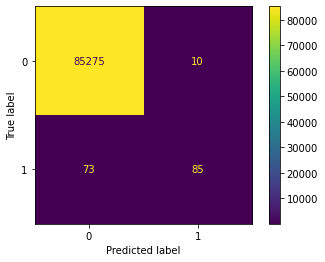

In [ ]:
x_predic_xgb = Best_xgb.predict(x_train)
accuracy = accuracy_score(y_train, x_predic_xgb)
print(f"Accuracy train xgb_unbalanced: %.2f%%" % (accuracy * 100.0))

test_predictions = Best_xgb.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test xgb_balanced: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

Clasificación aleatoria: ROC AUC=0.500
Modelo XGBoost : ROC AUC=0.942


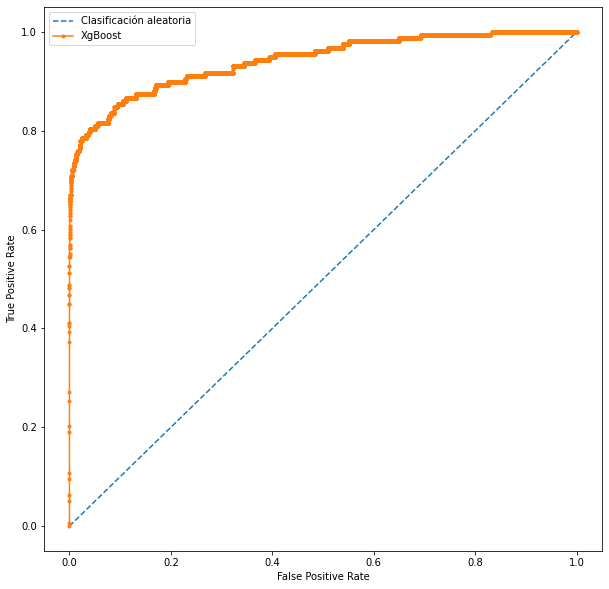

In [ ]:
# # Entrenamiento de modelo - Reg. logística:

# # Importar módulo:
# from sklearn.linear_model import LogisticRegression

# # Creamos el clasificador:
# model = LogisticRegression()
                            
# # Entrenamiento del modelo (clasificador):
# model.fit(Z_train, W_train)
# # Auxiliar para modelo aleatorio (comparación)
ns_probs = [0 for _ in range(len(y_test))]

# Generamos las probabilidades de pertenecer a cada clase usando el test.
lr_probs = clf.predict_proba(x_test)


# Dejamos sólo la probabilidad de clase = 1.
lr_probs = lr_probs[:, 1]

# AUC del modelo:
lr_XGB = roc_auc_score(y_test, lr_probs)

# AUC del modelo aleatorio de comparación:
ns_auc = roc_auc_score(y_test, ns_probs)

# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc))
print('Modelo XGBoost : ROC AUC=%.3f' % (lr_XGB))


lr_fpr_Xgb_unbalanced, lr_tpr_Xgb_unbalanced, _ = roc_curve(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_Xgb_unbalanced, lr_tpr_Xgb_unbalanced, marker='.', label='XgBoost')
#plt.plot(lr_fpr, lr_tpr, marker='.', label='XgBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Datos Balanceados

In [ ]:
clf_2=GridSearchCV(xgbc0,parameters,scoring='accuracy',cv=3)
balanced_clf = clf_2.fit(X_near, Y_near);


In [ ]:
balanced_clf.best_score_
Best_xgb_balanced=balanced_clf.best_estimator_

In [ ]:
x_predic_xgb_balanced=Best_xgb_balanced.predict(x_test)
#prediccion_Z_test= 
precision_score(y_test,x_predic_xgb_balanced)
print('presicion del modelo')
#print(prediccion_Z_test)
mat=confusion_matrix(y_test,x_predic_xgb_balanced)
print('Matriz de confusion')
print(mat)

presicion del modelo
Matriz de confusion
[[ 5938 79347]
 [    1   157]]


Accuracy train rlog_unbalanced: 99.25%
Accuracy test rlog_balanced: 7.13%


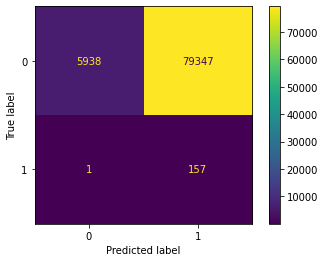

In [ ]:
x_predic_xgb_balanced = Best_xgb_balanced.predict(X_near)
accuracy = accuracy_score(Y_near, x_predic_xgb_balanced )
print(f"Accuracy train xgb_balanced: %.2f%%" % (accuracy * 100.0))

test_predictions = Best_xgb_balanced.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test xgb_balanced: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

In [ ]:
results = clf_2.cv_results_
params = results['params']
mean = results['mean_test_score']

In [ ]:
df = pd.DataFrame(results)
df.sort_values(by=['rank_test_score'], ascending=True)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_n_estimators,param_ntreads,param_objetive,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
2,0.025126,0.000329,0.001473,0.000289,0.1,100,1,binary:logistic,"{'learning_rate': 0.1, 'n_estimators': 100, 'n...",0.977578,0.973094,0.963964,0.971546,0.005665,1
3,0.046759,0.002962,0.002103,0.000185,0.1,200,1,binary:logistic,"{'learning_rate': 0.1, 'n_estimators': 200, 'n...",0.973094,0.977578,0.963964,0.971546,0.005665,1
1,0.045482,0.000129,0.001882,0.000035,0.05,200,1,binary:logistic,"{'learning_rate': 0.05, 'n_estimators': 200, '...",0.973094,0.973094,0.963964,0.970051,0.004304,3
0,0.029283,0.004898,0.001229,0.000012,0.05,100,1,binary:logistic,"{'learning_rate': 0.05, 'n_estimators': 100, '...",0.959641,0.973094,0.959459,0.964065,0.006385,4


In [ ]:
#Mejores parametros
clf_2.best_params_

{'learning_rate': 0.1,
 'n_estimators': 100,
 'ntreads': 1,
 'objetive': 'binary:logistic'}

Clasificación aleatoria: ROC AUC=0.500
Modelo XGBoost : ROC AUC=0.681


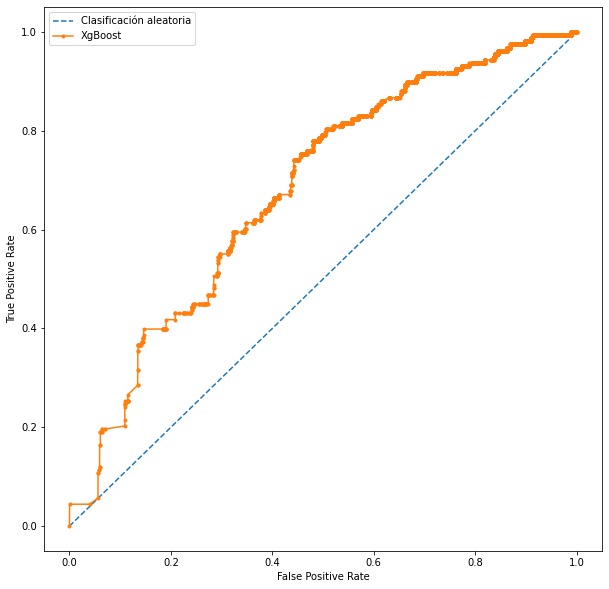

In [ ]:
# # Entrenamiento de modelo - Reg. logística:

# # Importar módulo:
# from sklearn.linear_model import LogisticRegression

# # Creamos el clasificador:
# model = LogisticRegression()
                            
# # Entrenamiento del modelo (clasificador):
# model.fit(Z_train, W_train)
# # Auxiliar para modelo aleatorio (comparación)
ns_probs = [0 for _ in range(len(y_test))]

# Generamos las probabilidades de pertenecer a cada clase usando el test.
lr_probs = Best_xgb_balanced.predict_proba(x_test)


# Dejamos sólo la probabilidad de clase = 1.
lr_probs = lr_probs[:, 1]

# AUC del modelo:
lr_XGB = roc_auc_score(y_test, lr_probs)

# AUC del modelo aleatorio de comparación:
ns_auc = roc_auc_score(y_test, ns_probs)

# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc))
print('Modelo XGBoost : ROC AUC=%.3f' % (lr_XGB))


lr_fpr_Xgb_balanced, lr_tpr_Xgb_balanced, _ = roc_curve(y_test, lr_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_Xgb_balanced, lr_tpr_Xgb_balanced, marker='.', label='XgBoost')
#plt.plot(lr_fpr, lr_tpr, marker='.', label='XgBoost')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Random Forest:

## Datos Sin Balancear

In [ ]:
#Train
clf_ensable=ensemble.RandomForestClassifier(max_depth=3,n_estimators=100,random_state=10)
clf_ensable.fit(x_train,y_train);

In [ ]:
#Train
y_predict_Randon=clf_ensable.predict(x_test)
print(classification_report(y_test,y_predict_Randon))
mat=confusion_matrix(y_test,y_predict_Randon)
print('Matriz de confusion')
print(mat)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85285
           1       0.83      0.49      0.62       158

    accuracy                           1.00     85443
   macro avg       0.91      0.75      0.81     85443
weighted avg       1.00      1.00      1.00     85443

Matriz de confusion
[[85269    16]
 [   80    78]]


Accuracy train rlog_unbalanced: 99.89%
Accuracy test rlog_unbalanced: 99.89%


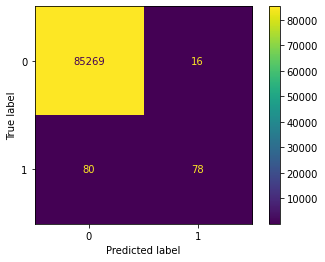

In [ ]:
random_forest_unbalanced_predict = clf_ensable.predict(x_train)
accuracy = accuracy_score(y_train, random_forest_unbalanced_predict)
print(f"Accuracy train rf_unbalanced: %.2f%%" % (accuracy * 100.0))

test_predictions = clf_ensable.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test rf_unbalanced: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

Clasificación aleatoria: ROC AUC=0.500
Random Forest: ROC AUC=0.929


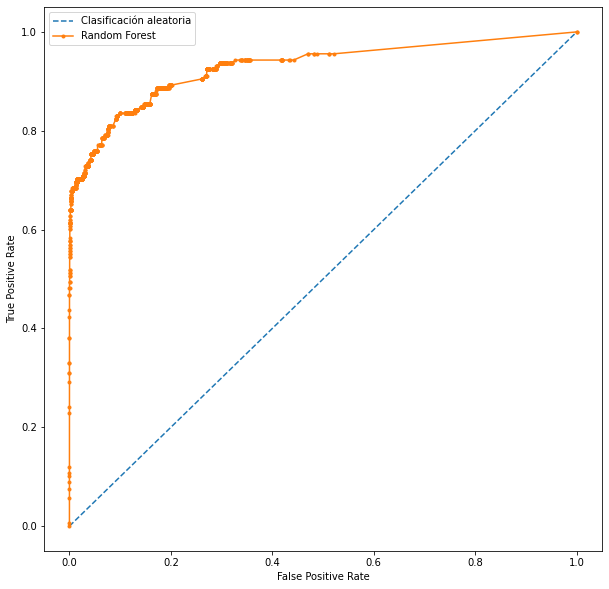

In [ ]:
# Auxiliar para modelo aleatorio (comparación)
ns_probs_rf = [0 for _ in range(len(y_test))]

# Generamos las probabilidades de pertenecer a cada clase usando el test.
lr_probs_rf = clf_ensable.predict_proba(x_test)

# Dejamos sólo la probabilidad de clase = 1.
lr_probs_rf = lr_probs_rf[:, 1]

# AUC del modelo:
lr_auc_rf = roc_auc_score(y_test, lr_probs_rf)

# AUC del modelo aleatorio de comparación:
ns_auc_rf = roc_auc_score(y_test, ns_probs_rf)

# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc_rf))
print('Random Forest: ROC AUC=%.3f' % (lr_auc_rf))

# Cálculo de curvas ROC:
lr_fpr_rf_unbalanced, lr_tpr_rf_unbalanced, __rf = roc_curve(y_test, lr_probs_rf)
ns_fpr_rf, ns_tpr_rf, __rf = roc_curve(y_test, ns_probs_rf)

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr_rf, ns_tpr_rf, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_rf_unbalanced, lr_tpr_rf_unbalanced, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

## Datos Balanceados

In [ ]:
clf_ensable_balanced=ensemble.RandomForestClassifier(max_depth=3,n_estimators=100,random_state=10)
clf_ensable_balanced.fit(X_near, Y_near);

In [ ]:
x_predic_clf_ensable_balanced=clf_ensable_balanced.predict(x_test)
prediccion_Y_test= precision_score(y_test, x_predic_clf_ensable_balanced)
print('presicion del modelo')
print(prediccion_Y_test)
mat=confusion_matrix(y_test,x_predic_clf_ensable_balanced)
print('Matriz de confusion')
print(mat)

presicion del modelo
0.0019548443892082232
Matriz de confusion
[[ 8192 77093]
 [    7   151]]


Accuracy train clf_ensable_balanced: 97.60%
Accuracy test clf_ensable_balanced: 9.76%


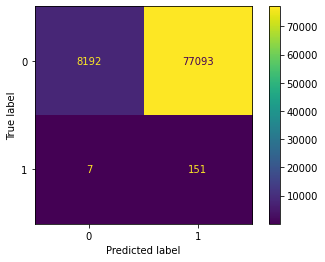

In [ ]:
x_predic_clf_ensable_balanced=clf_ensable_balanced.predict(X_near)
accuracy = accuracy_score(Y_near, x_predic_clf_ensable_balanced )
print(f"Accuracy train rf_balanced: %.2f%%" % (accuracy * 100.0))

test_predictions = clf_ensable_balanced.predict(x_test)
accuracy = accuracy_score(y_test, test_predictions)
print(f"Accuracy test rf_balanced: %.2f%%" % (accuracy * 100.0))
ConfusionMatrixDisplay.from_predictions(y_test, test_predictions)
plt.show()

Clasificación aleatoria: ROC AUC=0.500
Random Forest: ROC AUC=0.815


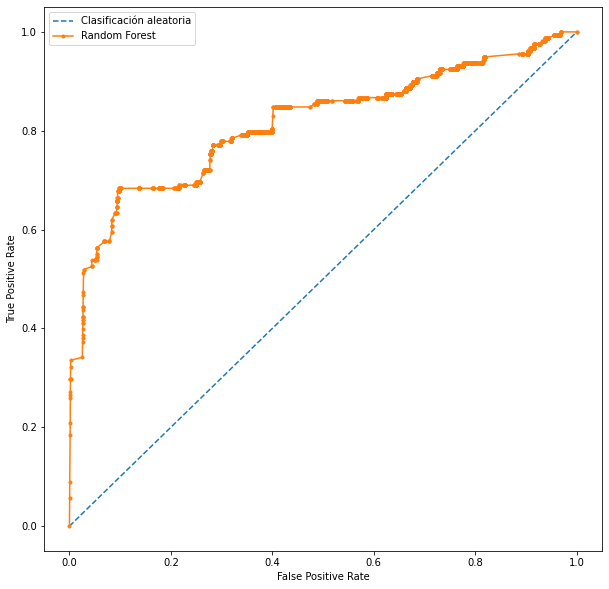

In [ ]:
# Auxiliar para modelo aleatorio (comparación)
ns_probs_rf = [0 for _ in range(len(y_test))]

# Generamos las probabilidades de pertenecer a cada clase usando el test.
lr_probs_rf = clf_ensable_balanced.predict_proba(x_test)

# Dejamos sólo la probabilidad de clase = 1.
lr_probs_rf = lr_probs_rf[:, 1]

# AUC del modelo:
lr_auc_rf = roc_auc_score(y_test, lr_probs_rf)

# AUC del modelo aleatorio de comparación:
ns_auc_rf = roc_auc_score(y_test, ns_probs_rf)

# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc_rf))
print('Random Forest: ROC AUC=%.3f' % (lr_auc_rf))

# Cálculo de curvas ROC:
lr_fpr_rf_balanced, lr_tpr_rf_balanced, __rf = roc_curve(y_test, lr_probs_rf)
ns_fpr_rf, ns_tpr_rf, __rf = roc_curve(y_test, ns_probs_rf)

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr_rf, ns_tpr_rf, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_rf_balanced, lr_tpr_rf_balanced, marker='.', label='Random Forest')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Clasificación aleatoria: ROC AUC=0.500
Modelo regresión logística no balanceado: ROC AUC=0.881
Modelo XGBoots no balanceado: ROC AUC=0.681
Modelo Random Forest no balanceado: ROC AUC=0.815


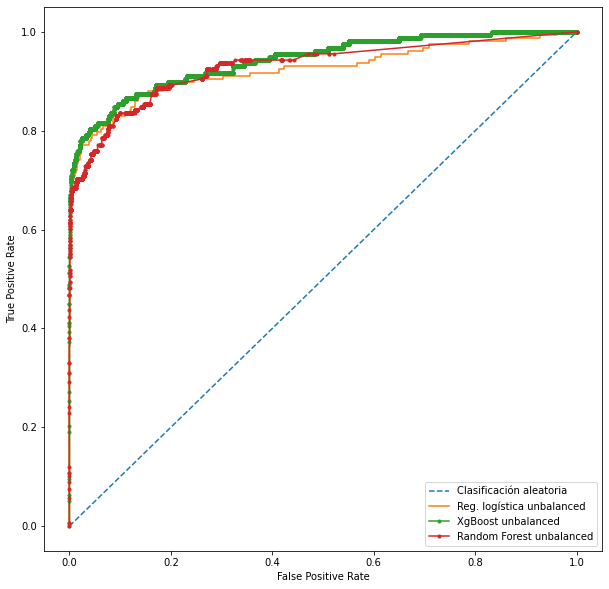

In [ ]:
# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc_rf))
print('Modelo regresión logística no balanceado: ROC AUC=%.3f' % (lr_auc))
print('Modelo XGBoots no balanceado: ROC AUC=%.3f' % (lr_XGB))
print('Modelo Random Forest no balanceado: ROC AUC=%.3f' % (lr_auc_rf))

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr_rf, ns_tpr_rf, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_unbalanced, lr_tpr_unbalanced, linestyle='-', label='Reg. logística unbalanced')

plt.plot(lr_fpr_Xgb_unbalanced, lr_tpr_Xgb_unbalanced, marker='.', label='XgBoost unbalanced')

plt.plot(lr_fpr_rf_unbalanced, lr_tpr_rf_unbalanced, marker='.', label='Random Forest unbalanced')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

Clasificación aleatoria: ROC AUC=0.500
Modelo regresión logística balanceado: ROC AUC=0.881
Modelo XGBoots balanceado: ROC AUC=0.681
Modelo Random Forest balanceado: ROC AUC=0.815


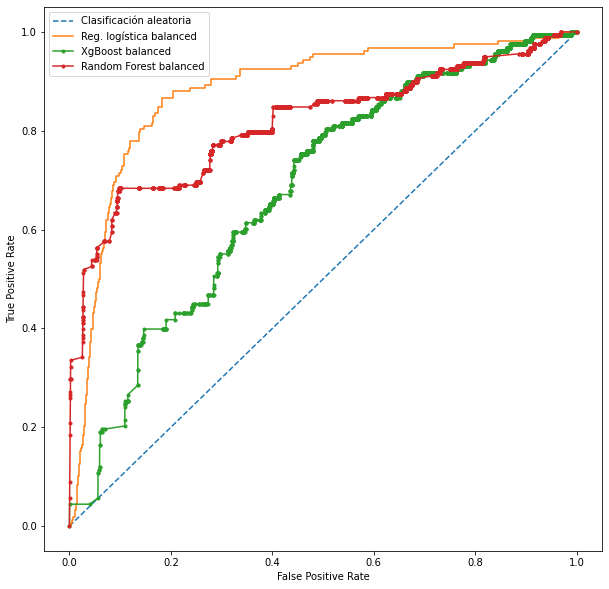

In [ ]:
# Resumen de scores AUC:
print('Clasificación aleatoria: ROC AUC=%.3f' % (ns_auc_rf))
print('Modelo regresión logística balanceado: ROC AUC=%.3f' % (lr_auc))
print('Modelo XGBoots balanceado: ROC AUC=%.3f' % (lr_XGB))
print('Modelo Random Forest balanceado: ROC AUC=%.3f' % (lr_auc_rf))

# Graficamos las curvas ROC:
plt.figure(figsize=(10,10))
plt.plot(ns_fpr_rf, ns_tpr_rf, linestyle='--', label='Clasificación aleatoria')
plt.plot(lr_fpr_balanced, lr_tpr_balanced, linestyle='-', label='Reg. logística balanced')

plt.plot(lr_fpr_Xgb_balanced, lr_tpr_Xgb_balanced, marker='.', label='XgBoost balanced')

plt.plot(lr_fpr_rf_balanced, lr_tpr_rf_balanced, marker='.', label='Random Forest balanced')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

**Extra**: Si tienen tiempo y les interesa, pueden tomar el modelo que mejor AUC ROC dio e iterar sobre esta arquitectura usando cross-validation en busca de una mejora de parámetros o hiperparámetros.

3. BI y análisis. Ahora vamos a analizar nuestros resultados para presentarselos a nuestros cliente o equipo de negocios. Ahora bien, podemos tener un modelo cuyas métricas de ML sean geniales, pero lamentablemente esto por sí solo no va a resolver el problema. Es el momento de bajar los resultados a métricas entendibles por el equipo de negocios y justificar a través de ellas la puesta en producción -o no- de dicho modelo. Esto va a requerir un entendimiento y explicación de qué devuelve el modelo cuando evalúa un pago (esto puede entenderse como el valor de la columna "prediction").
-  De todos modelos entrenados con mejores métricas ¿cuál posee el menor **porcentaje de fraude** en relación al monto? ¿coincide esta métrica con la performance en otras métricas de ML elegidas o sucede que hay algún modelo que si bien atrapa menos cbk atrapa por lo general cbk de montos altos?
- En relación a la perfomance de los dos mejores modelos considerando montos bajos, de [10-30] como montos intermedios-bajos, [30-50] como montos intermedios-altos, y [+50] como montos altos (del primer práctico), comparen el porcentaje de fraude entre estos modelos para cada uno de estos grupos de pagos.

# 3. BI y análisis

La variable que nos interesa de todos estos modelos es la del falso negativo, ya que significa que se el modelo proceso un pago como verídico, cuando en realidad era fraudulento. Podriamos acomodar los modelos, segun este parametro y en orden de menor a mayor de la siguiente forma: XGBoost(64), random forest(80) y regresion logistica(216)

In [ ]:
# rlog_unbalanced
rlog_unbalanced = reg_logistica.predict(x_test)
print('contador logistic regresion sin balancear: ', Counter(rlog_unbalanced))

mat=confusion_matrix(y_test,rlog_unbalanced)
print('Matriz de confusion logistic regresion sin balancear')
print(mat)
print('')

# rlog_balanced
rlog_balanced = reg_logistica_bal.predict(x_test)
print('contador logistic regresion balanceado: ', Counter(rlog_balanced))

mat=confusion_matrix(y_test,rlog_balanced)
print('Matriz de confusion logistic regresion balanceado')
print(mat)
print('')

# XGBoost
xgboost_unbalanced = clf.predict(x_test)
print('contador XGBoost sin balancear: ', Counter(xgboost_unbalanced))

mat=confusion_matrix(y_test,xgboost_unbalanced)
print('Matriz de confusion XGBoost sin balancear')
print(mat)
print('')

# XGBoost balanced
xgboost_balanced = Best_xgb_balanced.predict(x_test)
print('contador XGBoost balanceado: ', Counter(xgboost_balanced))

mat=confusion_matrix(y_test,xgboost_balanced)
print('Matriz de confusion XGBoost balanceado')
print(mat)
print('')

# random Forest
random_forest_unbalanced = clf_ensable.predict(x_test)
print('contador random forest sin balancear: ', Counter(random_forest_unbalanced))

mat=confusion_matrix(y_test,random_forest_unbalanced)
print('Matriz de confusion random forest sin balancear')
print(mat)
print('')

# random Forest balanced
random_forest_balanced = clf_ensable_balanced.predict(x_test)
print('contador random forest balanceado: ', Counter(random_forest_balanced))

mat=confusion_matrix(y_test,random_forest_balanced)
print('Matriz de confusion random forest balanceado')
print(mat)
print('')

contador logistic regresion sin balancear:  Counter({0: 85384, 1: 59})
Matriz de confusion logistic regresion sin balancear
[[85277     8]
 [  107    51]]

contador logistic regresion balanceado:  Counter({0: 70674, 1: 14769})
Matriz de confusion logistic regresion balanceado
[[70648 14637]
 [   26   132]]

contador XGBoost sin balancear:  Counter({0: 85348, 1: 95})
Matriz de confusion XGBoost sin balancear
[[85275    10]
 [   73    85]]

contador XGBoost balanceado:  Counter({1: 79504, 0: 5939})
Matriz de confusion XGBoost balanceado
[[ 5938 79347]
 [    1   157]]

contador random forest sin balancear:  Counter({0: 85349, 1: 94})
Matriz de confusion random forest sin balancear
[[85269    16]
 [   80    78]]

contador random forest balanceado:  Counter({1: 77244, 0: 8199})
Matriz de confusion random forest balanceado
[[ 8192 77093]
 [    7   151]]



In [ ]:
scaled_df.shape

(284807, 4)

De todos los modelos los que parecen predecir mejor la categoria de fraude (Class=1) son:
* XGBoost  sin balancear 
* Random Forest sin balancear
* Logistic regresion sin balancear

In [ ]:
df_test = pd.DataFrame(x_test,columns=['Amount','last_hour_fraud','V11','V20'])
df_test['Class'] = np.array(y_test)
df_test.head(5)

,Amount,last_hour_fraud,V11,V20,Class
0,-0.141251,-1.164007,-0.914376,-0.430831,0
1,-0.285662,0.739444,0.617468,-0.255880,0
2,-0.247880,-0.620164,-0.237651,-0.227744,0
3,4.071653,-0.484203,0.338506,2.196951,0
4,0.165322,0.195601,1.457271,0.211099,0


In [ ]:
new_df = df_test[variables].assign(rlog_unbalanced=rlog_unbalanced, xgboost_unbalanced=xgboost_unbalanced, xgboost_best_score=xgboost_best_score, random_forest_unbalanced=random_forest_unbalanced, Class=df_test['Class'])
new_df.head(5)

,Amount,last_hour_fraud,V11,V20,rlog_unbalanced,xgboost_unbalanced,xgboost_best_score,random_forest_unbalanced,Class
0,-0.141251,-1.164007,-0.914376,-0.430831,0,0,0,0,0
1,-0.285662,0.739444,0.617468,-0.255880,0,0,0,0,0
2,-0.247880,-0.620164,-0.237651,-0.227744,0,0,0,0,0
3,4.071653,-0.484203,0.338506,2.196951,0,0,0,0,0
4,0.165322,0.195601,1.457271,0.211099,0,0,0,0,0


In [ ]:
rlog_unbalanced_fraud_intercept = new_df.loc[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1), 'Amount'].sum()
xgboost_unbalanced_fraud_intercept = new_df.loc[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1), 'Amount'].sum()
random_forest_unbalanced_fraud_intercept = new_df.loc[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1), 'Amount'].sum()

print("Monto de fraude total: ", new_df.loc[new_df['Class'] == 1, 'Amount'].sum())
print("Logistic regresion sin balancear: ", rlog_unbalanced_fraud_intercept)
print("XGBoost sin balancear: ", xgboost_unbalanced_fraud_intercept)
print("Random Forest sin balancear: ", random_forest_unbalanced_fraud_intercept)

Monto de fraude total:  14.181812075935362
Logistic regresion sin balancear:  2.786943617131788
XGBoost sin balancear:  0.28147471821297215
Random Forest sin balancear:  1.9926849342071942


In [ ]:
title = {'title': 'Comparación montos atajados por cada modelo y monto del fraude real'}
tags = ['Logistic regresion', 'XGBoost', 'Random Forest', 'Fraude Total']
amounts = [rlog_unbalanced_fraud_intercept,
           xgboost_unbalanced_fraud_intercept,
           random_forest_unbalanced_fraud_intercept,
           new_df.loc[new_df['Class'] == 1, 'Amount'].sum()
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

**Logistic regresion**

In [ ]:
print("Logistic Regresion: Montos")
rlog_unbalanced_fraud_intercept1 = new_df.loc[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] < 30), 'Amount'].sum()
print("Montos menores a 30: ", rlog_unbalanced_fraud_intercept1)

rlog_unbalanced_fraud_intercept2 = new_df.loc[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 30) & (new_df['Amount'] < 50), 'Amount'].sum()
print("Montos entre 30 y 50: ",rlog_unbalanced_fraud_intercept2)

rlog_unbalanced_fraud_intercept3 = new_df.loc[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 50), 'Amount'].sum()
print("Montos mayores a 50: ", rlog_unbalanced_fraud_intercept3)

Logistic Regresion: Montos
Montos menores a 30:  2.786943617131788
Montos entre 30 y 50:  0.0
Montos mayores a 50:  0.0


In [ ]:
title = {'title': 'Logistic Regresion: Montos de fraude segmentados en grupos por valor'}
tags = ['Menos de 30', 'entre 30 y 50', 'mas de 50']
amounts = [rlog_unbalanced_fraud_intercept1,
           rlog_unbalanced_fraud_intercept2,
           rlog_unbalanced_fraud_intercept3
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

In [ ]:
print("Logistic Regresion: conteo de incidencias verdaderos positivos")
print("Total de verdaderos positivos: ", len(new_df[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1)]))
rlog_unbalanced_fraud_intercept1b = len(new_df[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] < 30)])
print("Montos menores a 30: ", rlog_unbalanced_fraud_intercept1b)

rlog_unbalanced_fraud_intercept2b = len(new_df.loc[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 30) & (new_df['Amount'] < 50)])
print("Montos entre 30 y 50: ",rlog_unbalanced_fraud_intercept2b)

rlog_unbalanced_fraud_intercept3b = len(new_df.loc[(new_df['rlog_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 50)])
print("Montos mayores a 50: ", rlog_unbalanced_fraud_intercept3b)

Logistic Regresion: conteo de incidencias verdaderos positivos
Total de verdaderos positivos:  51
Montos menores a 30:  51
Montos entre 30 y 50:  0
Montos mayores a 50:  0


In [ ]:
title = {'title': 'Logistic Regresion: Montos de fraude segmentados en grupos por cantidad de incidencias'}
tags = ['Menos de 30', 'entre 30 y 50', 'mas de 50']
amounts = [rlog_unbalanced_fraud_intercept1b,
           rlog_unbalanced_fraud_intercept2b,
           rlog_unbalanced_fraud_intercept3b
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

In [ ]:
print("XGBoost: Montos")
xgboost_unbalanced_fraud_intercept1 = new_df.loc[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] < 30), 'Amount'].sum()
print("Montos menores a 30: ", rlog_unbalanced_fraud_intercept1)

xgboost_unbalanced_fraud_intercept2 = new_df.loc[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 30) & (new_df['Amount'] < 50), 'Amount'].sum()
print("Montos entre 30 y 50: ",xgboost_unbalanced_fraud_intercept2)

xgboost_unbalanced_fraud_intercept3 = new_df.loc[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 50), 'Amount'].sum()
print("Montos mayores a 50: ", xgboost_unbalanced_fraud_intercept3)

XGBoost: Montos
Montos menores a 30:  2.786943617131788
Montos entre 30 y 50:  0.0
Montos mayores a 50:  0.0


In [ ]:
title = {'title': 'XGBoost: Montos de fraude segmentados en grupos por valor'}
tags = ['Menos de 30', 'entre 30 y 50', 'mas de 50']
amounts = [xgboost_unbalanced_fraud_intercept1,
           xgboost_unbalanced_fraud_intercept2,
           xgboost_unbalanced_fraud_intercept3
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

In [ ]:
print("XGBoost: conteo de incidencias verdaderos positivos")
print("Total de verdaderos positivos: ", len(new_df[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1)]))
xgboost_unbalanced_fraud_intercept1b = len(new_df[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] < 30)])
print("Montos menores a 30: ", xgboost_unbalanced_fraud_intercept1b)

xgboost_unbalanced_fraud_intercept2b = len(new_df.loc[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 30) & (new_df['Amount'] < 50)])
print("Montos entre 30 y 50: ",xgboost_unbalanced_fraud_intercept2b)

xgboost_unbalanced_fraud_intercept3b = len(new_df.loc[(new_df['xgboost_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 50)])
print("Montos mayores a 50: ", xgboost_unbalanced_fraud_intercept3b)

XGBoost: conteo de incidencias verdaderos positivos
Total de verdaderos positivos:  85
Montos menores a 30:  85
Montos entre 30 y 50:  0
Montos mayores a 50:  0


In [ ]:
title = {'title': 'XGBoost: Montos de fraude segmentados en grupos por cantidad de incidencias'}
tags = ['Menos de 30', 'entre 30 y 50', 'mas de 50']
amounts = [xgboost_unbalanced_fraud_intercept1b,
           xgboost_unbalanced_fraud_intercept2b,
           xgboost_unbalanced_fraud_intercept3b
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

**Random Forest**

In [ ]:
print("Random Forest: Montos")
random_forest_unbalanced_fraud_intercept1 = new_df.loc[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] < 30), 'Amount'].sum()
print("Montos menores a 30: ", rlog_unbalanced_fraud_intercept1)

random_forest_unbalanced_fraud_intercept2 = new_df.loc[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 30) & (new_df['Amount'] < 50), 'Amount'].sum()
print("Montos entre 30 y 50: ",random_forest_unbalanced_fraud_intercept2)

random_forest_unbalanced_fraud_intercept3 = new_df.loc[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 50), 'Amount'].sum()
print("Montos mayores a 50: ", random_forest_unbalanced_fraud_intercept3)

Random Forest: Montos
Montos menores a 30:  2.786943617131788
Montos entre 30 y 50:  0.0
Montos mayores a 50:  0.0


In [ ]:
title = {'title': 'Random Forest: Montos de fraude segmentados en grupos por valor'}
tags = ['Menos de 30', 'entre 30 y 50', 'mas de 50']
amounts = [random_forest_unbalanced_fraud_intercept1,
           random_forest_unbalanced_fraud_intercept2,
           random_forest_unbalanced_fraud_intercept3
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

In [ ]:
print("Random Forest: conteo de incidencias verdaderos positivos")
print("Total de verdaderos positivos: ", len(new_df[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1)]))
random_forest_unbalanced_fraud_intercept1b = len(new_df[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] < 30)])
print("Montos menores a 30: ", random_forest_unbalanced_fraud_intercept1b)

random_forest_unbalanced_fraud_intercept2b = len(new_df.loc[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 30) & (new_df['Amount'] < 50)])
print("Montos entre 30 y 50: ",random_forest_unbalanced_fraud_intercept2b)

random_forest_unbalanced_fraud_intercept3b = len(new_df.loc[(new_df['random_forest_unbalanced'] == 1) & (new_df['Class'] == 1) & (new_df['Amount'] > 50)])
print("Montos mayores a 50: ", random_forest_unbalanced_fraud_intercept3b)

Random Forest: conteo de incidencias verdaderos positivos
Total de verdaderos positivos:  78
Montos menores a 30:  78
Montos entre 30 y 50:  0
Montos mayores a 50:  0


In [ ]:
title = {'title': 'Random Forest: Montos de fraude segmentados en grupos por cantidad de incidencias'}
tags = ['Menos de 30', 'entre 30 y 50', 'mas de 50']
amounts = [random_forest_unbalanced_fraud_intercept1b,
           random_forest_unbalanced_fraud_intercept2b,
           random_forest_unbalanced_fraud_intercept3b
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

# Conclusiones

In [ ]:
details = {
    'Model' : ['logistic_regression', 'XGBoost', 'random_forest'],
    'less than 30' : [rlog_unbalanced_fraud_intercept1, xgboost_unbalanced_fraud_intercept1, random_forest_unbalanced_fraud_intercept1],
    'between 30 and 50' : [rlog_unbalanced_fraud_intercept2, xgboost_unbalanced_fraud_intercept2, random_forest_unbalanced_fraud_intercept2],
    'more than 50' : [rlog_unbalanced_fraud_intercept3, xgboost_unbalanced_fraud_intercept3, random_forest_unbalanced_fraud_intercept3]
}
  
print("comparativa entre montos atajados por modelo")
df_conclusiones = pd.DataFrame(details)
df_conclusiones.head()

comparativa entre montos atajados por modelo


,Model,less than 30,between 30 and 50,more than 50
0,logistic_regression,2.786944,0.0,0.0
1,XGBoost,0.281475,0.0,0.0
2,random_forest,1.992685,0.0,0.0


In [ ]:
detailsb = {
    'Model' : ['logistic_regression', 'XGBoost', 'random_forest'],
    'less than 30' : [rlog_unbalanced_fraud_intercept1b, xgboost_unbalanced_fraud_intercept1b, random_forest_unbalanced_fraud_intercept1b],
    'between 30 and 50' : [rlog_unbalanced_fraud_intercept2b, xgboost_unbalanced_fraud_intercept2b, random_forest_unbalanced_fraud_intercept2b],
    'more than 50' : [rlog_unbalanced_fraud_intercept3b, xgboost_unbalanced_fraud_intercept3b, random_forest_unbalanced_fraud_intercept3b]
}
  
print("comparativa entre montos atajados por modelo")
df_conclusiones2 = pd.DataFrame(detailsb)
df_conclusiones2.head()

comparativa entre montos atajados por modelo


,Model,less than 30,between 30 and 50,more than 50
0,logistic_regression,51,0,0
1,XGBoost,85,0,0
2,random_forest,78,0,0


In [ ]:
title = {'title': 'Comparativos: Montos de fraude  mas de 50'}
tags = ['Logistic Regresion', 'XGBoost', 'Random Forest']
amounts = [rlog_unbalanced_fraud_intercept3,
           xgboost_unbalanced_fraud_intercept3,
           random_forest_unbalanced_fraud_intercept3
          ]
data = [go.Bar(
   x = tags,
   y = amounts
)]
fig = go.Figure(data=data, layout=title)
fig.show()

In [ ]:
# Catplot Años de experiencia vs Género
Datos = { 'Modelos':['Logistic Regresion', 'XGBoost', 'Random Forest'],
         'Amount':[rlog_unbalanced_fraud_intercept3,
           xgboost_unbalanced_fraud_intercept3,
           random_forest_unbalanced_fraud_intercept3
          ]
         }

df=pd.DataFrame(Datos)
df


,Modelos,Amount
0,Logistic Regresion,0.0
1,XGBoost,0.0
2,Random Forest,0.0


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

labels = df['Modelos']

# Create subplots: use 'domain' type for Pie subplot
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]])
fig.add_trace(go.Pie(labels=labels, values=df['Amount']),
              1, 1)


# Use `hole` to create a donut-like pie chart
fig.update_traces(hole=.4, hoverinfo="label+percent+name")

fig.update_layout(
    title_text="Proporciones de Amount por Modelos",
    # Add annotations in the center of the donut pies.
    annotations=[dict(text='    Modelos', x=0.15, y=0.5, font_size=20, showarrow=False)])
fig.show()

**Resumen:**
Al analisar los 3 modelos, podemos ver que el que mejor resultado nos da para montos superiores a 50 es XGBoost con un 44%, es decir que nuestro modelos  si  fuese implementado, tendria un recupero de un monto aprox de 28401.43.
Tambiem podemos notar que el la Curva Roc, comparando los 3 modelos el que mejor se adapta sigue siendo el XGBoost.
